In [1]:
import pandas as pd
import numpy as np
import itertools
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Y_hat = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/04_Testing_Stacks/npy_Files/yy_hat_MIROC-ESM.npy").reshape(-1,129,135)
Y = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/Stacked/Y.npy").reshape(-1,129,135)[4:]
print(f"Y: {Y.shape}; Y_hat: {Y_hat.shape}")

Y: (21166, 129, 135); Y_hat: (21166, 129, 135)


In [3]:
print(Y.mean(), Y.std())
print(Y_hat.mean(), Y_hat.std())

0.8938756986074756 5.909183647118061
-0.014030058 0.523051


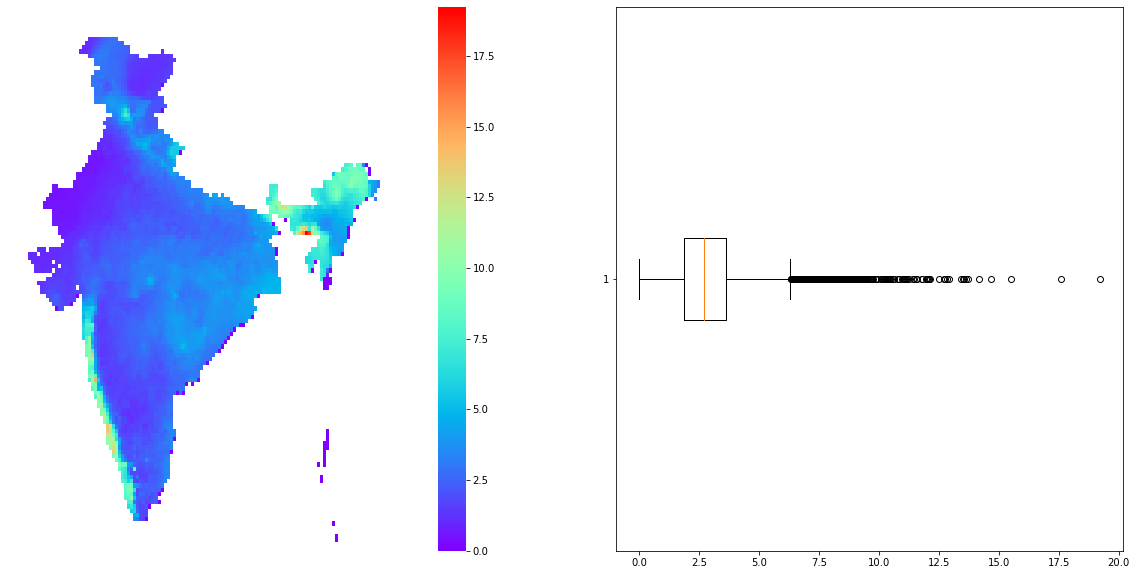

In [4]:
data = np.array(np.mean(Y, axis = 0))
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy"
mask = np.load(FileName)
indices = np.where(mask == 0)
data[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(data, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(data[~np.isnan(data)], vert = False)
plt.show()

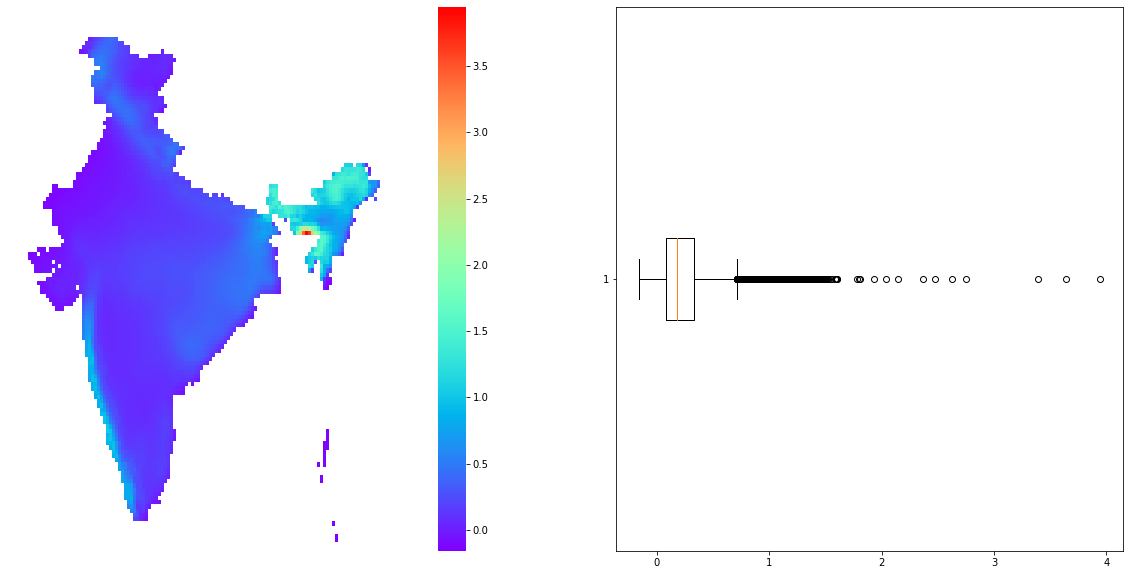

In [5]:
data = np.array(np.mean(Y_hat, axis = 0))
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy"
mask = np.load(FileName)
indices = np.where(mask == 0)
data[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(data, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(data[~np.isnan(data)], vert = False)
plt.show()

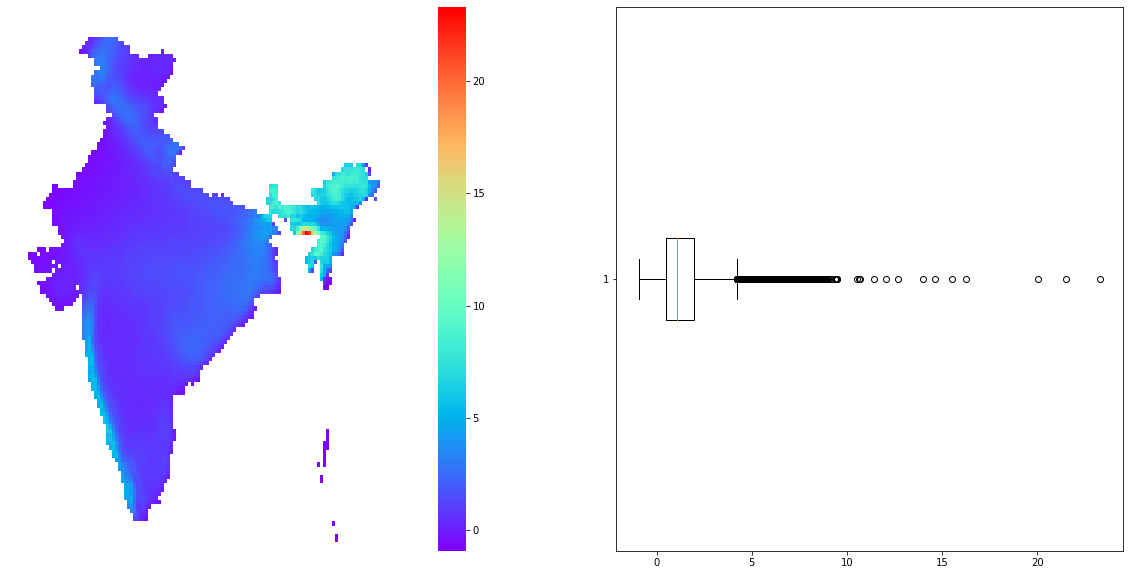

In [7]:
data = np.array(np.mean(Y_hat*Y.std(), axis = 0))
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy"
mask = np.load(FileName)
indices = np.where(mask == 0)
data[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(data, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(data[~np.isnan(data)], vert = False)
plt.show()

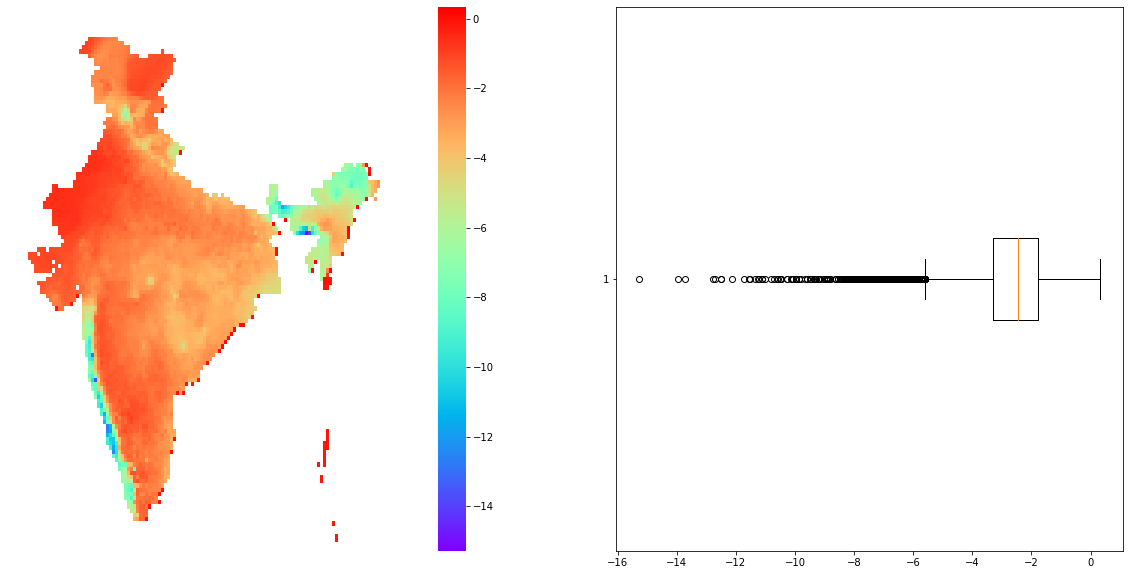

In [8]:
Y_diff = np.mean(Y_hat - Y, axis = 0)

data = np.array(Y_diff)
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy"
mask = np.load(FileName)
indices = np.where(mask == 0)
data[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(data, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(data[~np.isnan(data)], vert = False)
plt.show()

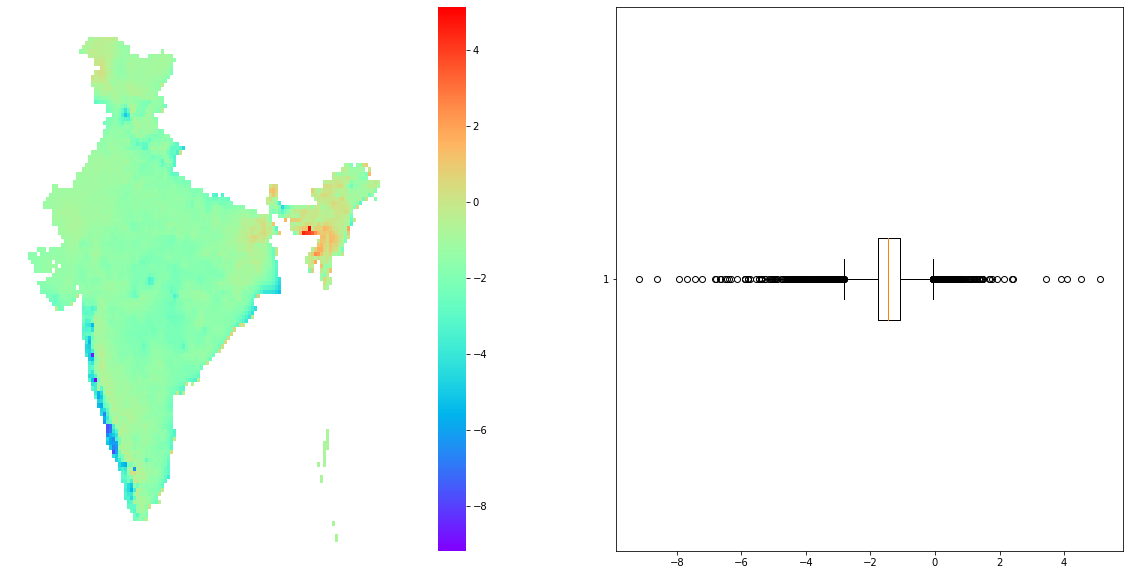

In [9]:
data = np.array(np.mean(Y_hat*Y.std() - Y, axis = 0))
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy"
mask = np.load(FileName)
indices = np.where(mask == 0)
data[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(data, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(data[~np.isnan(data)], vert = False)
plt.show()

2.6243003417852595


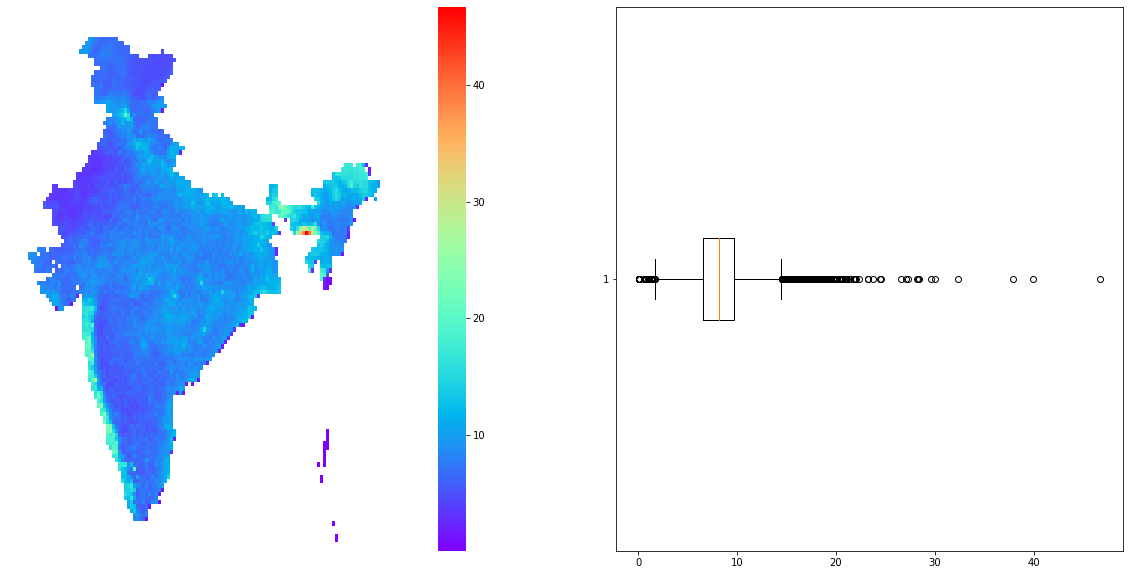

In [13]:
data = np.array(np.sqrt(np.sum(np.square(((Y_hat*Y.std())+Y.mean()) - Y), axis = 0)/21166))
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy"
mask = np.load(FileName)
indices = np.where(mask == 0)
data[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(data, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(data[~np.isnan(data)], vert = False)
plt.show()

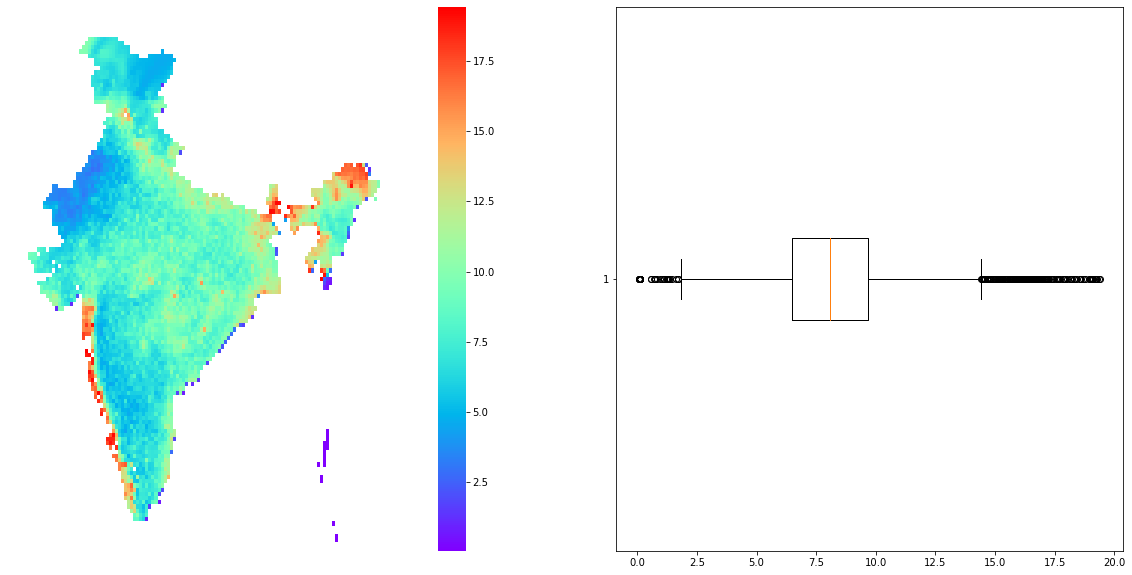

99th Precentile Threshold: 19.42308515850727
rmse mean: 8.334968507197999


In [27]:
# data = np.array(np.sqrt(np.sum(np.square(Y_hat*Y.std() - Y), axis = 0)/21166))
data = np.array(np.sqrt(np.sum(np.square(((Y_hat*Y.std())+Y.mean()) - Y), axis = 0)/21166))
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy"
mask = np.load(FileName)
indices = np.where(mask == 0)
data[indices] = np.nan
threshold_99 = np.nanpercentile(data, 99)
indices = np.where(data > threshold_99)
data[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(data, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(data[~np.isnan(data)], vert = False)
plt.show()

print(f"99th Precentile Threshold: {threshold_99}")
print(f"rmse mean: {np.nanmean(data)}")

# 99th Precentile Threshold: 19.584118703852727
# rmse mean: 8.442790990632261 (rmse mean: 8.599243188015244)

# Adding Y.mean()
# 99th Precentile Threshold: 19.42308515850727
# rmse mean: 8.334968507197999 (rmse mean: 8.491256848793007)

In [28]:
Y_hat = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/04_Testing_Stacks/npy_Files/yy_hat_MIROC-ESM_mon.npy").reshape(-1,129,135)
Y = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/Stacked/Y_mon.npy").reshape(-1,129,135)[4:]
print(f"Y: {Y.shape}; Y_hat: {Y_hat.shape}")

Y: (692, 129, 135); Y_hat: (692, 129, 135)


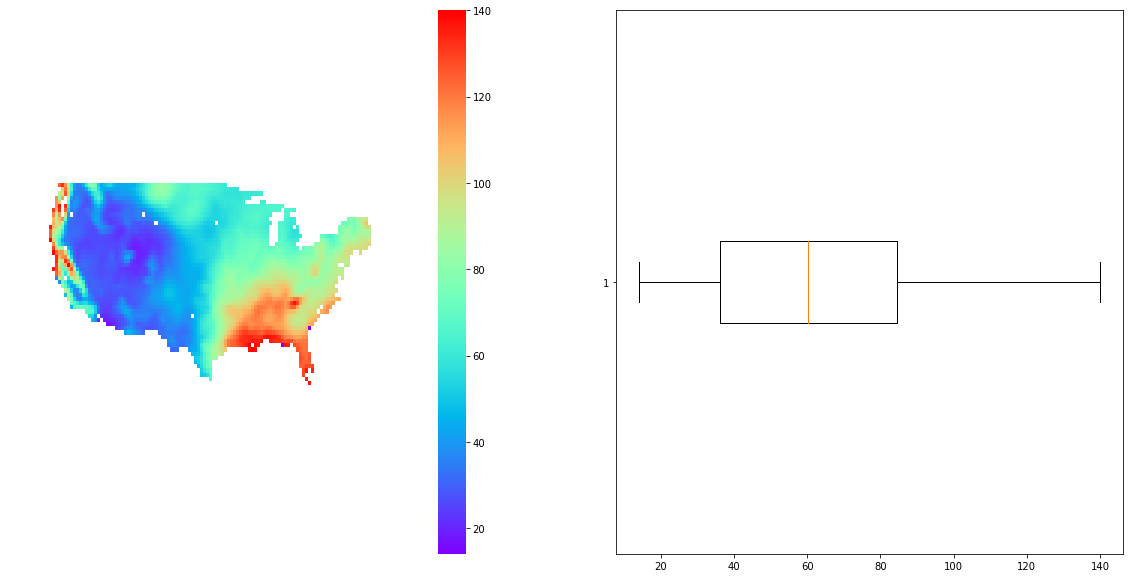

99th Precentile Threshold: 140.07861038896243
rmse mean: 63.06366934606548


In [35]:
# data = np.array(np.sqrt(np.sum(np.square(Y_hat*Y.std() - Y), axis = 0)/692))
data = np.array(np.sqrt(np.sum(np.square(((Y_hat*Y.std())+Y.mean()) - Y), axis = 0)/692))
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM_US.npy"
elev = np.load(FileName)
mask = np.zeros((129,135))
mask[39:90,12:123] = np.array(elev)
indices = np.where(mask == 0)
data[indices] = np.nan
threshold_99 = np.nanpercentile(data, 99)
indices = np.where(data > threshold_99)
data[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(data, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(data[~np.isnan(data)], vert = False)
plt.show()

print(f"99th Precentile Threshold: {threshold_99}")
print(f"rmse mean: {np.nanmean(data)}")

# 99th Precentile Threshold: 140.07861038896243
# rmse mean: 63.06366934606548 (rmse mean: 64.08542422930105)